In [1]:
import shap
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm  
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc,roc_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.metrics import roc_curve, auc,mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay  
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
os.getcwd()

'C:\\Users\\24993\\Desktop\\jupyter\\code'

In [3]:
dir="C:\\Users\\24993\\Desktop\\jupyter\\train_data"

y=pd.read_excel(os.path.join(dir,"y_train.xlsx"))
exp=pd.read_excel(os.path.join(dir,"exp_train.xlsx"))
meta=pd.read_excel(os.path.join(dir,"meta_train.xlsx"))
MRI=pd.read_excel(os.path.join(dir,"MRI_train.xlsx"))
intergrate=pd.read_excel(os.path.join(dir,"Intergrate_train.xlsx"))


y=y.iloc[:,1]
exp=exp.iloc[:,1:]
meta=meta.iloc[:,1:]
MRI=MRI.iloc[:,1:]
Intergrate=intergrate.iloc[:,1:]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(Intergrate, y, test_size=0.2)
model1=LogisticRegression()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
y_pred_proba = model1.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(auc)

In [25]:
models = {
    "Logit": LogisticRegression,
    "RF":RandomForestClassifier,
    "SVM": SVC,
    "XGB":XGBClassifier,
    # "LGB":LGBMClassifier
    "KNN": KNeighborsClassifier
   # "DT": DecisionTreeClassifier,
   # 
   # "AB":AdaBoostClassifier,
    # 其他模型可以在此添加
}

In [26]:
def objective(trial, model_class):
    if model_class == LogisticRegression:
        params = {
            "C": trial.suggest_loguniform("C", 1e-5, 1e2),
            "max_iter": trial.suggest_int("max_iter", 100, 1000)
        }
    elif model_class == RandomForestClassifier:
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 10, 200),
            "max_depth": trial.suggest_int("max_depth", 2, 32)
        }
    elif model_class == SVC:
        params = {
            "C": trial.suggest_loguniform("C", 1e-5, 1e2),
            "kernel": trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"]),
            "probability":trial.suggest_categorical("probability", [True])
        }
    elif model_class == XGBClassifier:
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 10, 200),
            "max_depth": trial.suggest_int("max_depth", 2, 32),
            "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 1.0)
        }
    # elif model_class == LGBMClassifier:
    #     params = {
    #         "n_estimators": trial.suggest_int("n_estimators", 10, 200),
    #         "max_depth": trial.suggest_int("max_depth", 2, 32),
    #         "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 1.0)
        # }
    elif model_class == KNeighborsClassifier:     
        params = {
        "n_neighbors": trial.suggest_int("n_neighbors", 1, 100),
        "weights": trial.suggest_categorical("weights", ['uniform', 'distance']),
        "metric": trial.suggest_categorical("metric", ['euclidean', 'manhattan', 'minkowski'])
    }

    model = model_class(**params)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(roc_auc_score)).mean()
    return score


In [27]:
optimized_models = {}

for name, model_class in models.items():
    study = optuna.create_study(direction="maximize")
    study.optimize(lambda trial: objective(trial, model_class), n_trials=50)
    optimized_models[name] = model_class(**study.best_params)

    print(f"Best parameters for {name}: {study.best_params}")

[I 2024-06-21 15:41:39,197] A new study created in memory with name: no-name-5b256034-e2de-4dcb-93b4-f9264e09f393
C:\Users\24993\AppData\Local\Temp\ipykernel_2920\2000621890.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-5, 1e2),
[I 2024-06-21 15:41:39,229] Trial 0 finished with value: 0.5 and parameters: {'C': 6.621625319365874e-05, 'max_iter': 405}. Best is trial 0 with value: 0.5.
C:\Users\24993\AppData\Local\Temp\ipykernel_2920\2000621890.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-5, 1e2),
[I 2024-06-21 15:41:39,273] Trial 1 finished with value: 0.6622222222222224 and parameter

Best parameters for Logit: {'C': 0.5917051502530051, 'max_iter': 340}


[I 2024-06-21 15:41:42,059] Trial 0 finished with value: 0.6888888888888889 and parameters: {'n_estimators': 148, 'max_depth': 8}. Best is trial 0 with value: 0.6888888888888889.
[I 2024-06-21 15:41:42,248] Trial 1 finished with value: 0.6322222222222222 and parameters: {'n_estimators': 35, 'max_depth': 2}. Best is trial 0 with value: 0.6888888888888889.
[I 2024-06-21 15:41:43,048] Trial 2 finished with value: 0.6644444444444446 and parameters: {'n_estimators': 156, 'max_depth': 13}. Best is trial 0 with value: 0.6888888888888889.
[I 2024-06-21 15:41:43,271] Trial 3 finished with value: 0.6777777777777777 and parameters: {'n_estimators': 41, 'max_depth': 9}. Best is trial 0 with value: 0.6888888888888889.
[I 2024-06-21 15:41:43,966] Trial 4 finished with value: 0.6588888888888889 and parameters: {'n_estimators': 136, 'max_depth': 27}. Best is trial 0 with value: 0.6888888888888889.
[I 2024-06-21 15:41:44,879] Trial 5 finished with value: 0.7222222222222221 and parameters: {'n_estimator

Best parameters for RF: {'n_estimators': 196, 'max_depth': 20}


[I 2024-06-21 15:42:14,422] Trial 8 finished with value: 0.6677777777777777 and parameters: {'C': 26.804297843649497, 'kernel': 'linear', 'probability': True}. Best is trial 4 with value: 0.6677777777777777.
C:\Users\24993\AppData\Local\Temp\ipykernel_2920\2000621890.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-5, 1e2),
[I 2024-06-21 15:42:14,444] Trial 9 finished with value: 0.5 and parameters: {'C': 0.000786661673122637, 'kernel': 'linear', 'probability': True}. Best is trial 4 with value: 0.6677777777777777.
C:\Users\24993\AppData\Local\Temp\ipykernel_2920\2000621890.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C

Best parameters for SVM: {'C': 11.606398152017949, 'kernel': 'sigmoid', 'probability': True}


[I 2024-06-21 15:42:15,913] Trial 0 finished with value: 0.5 and parameters: {'n_estimators': 128, 'max_depth': 27, 'learning_rate': 0.0001424858751860966}. Best is trial 0 with value: 0.5.
C:\Users\24993\AppData\Local\Temp\ipykernel_2920\2000621890.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 1.0)
[I 2024-06-21 15:42:16,088] Trial 1 finished with value: 0.6288888888888888 and parameters: {'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.5392786948261693}. Best is trial 1 with value: 0.6288888888888888.
C:\Users\24993\AppData\Local\Temp\ipykernel_2920\2000621890.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(...

Best parameters for XGB: {'n_estimators': 129, 'max_depth': 32, 'learning_rate': 0.022794494516014188}


[I 2024-06-21 15:42:34,274] Trial 1 finished with value: 0.6022222222222222 and parameters: {'n_neighbors': 18, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 1 with value: 0.6022222222222222.
[I 2024-06-21 15:42:34,709] Trial 2 finished with value: 0.5822222222222223 and parameters: {'n_neighbors': 11, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 1 with value: 0.6022222222222222.
[I 2024-06-21 15:42:35,128] Trial 3 finished with value: 0.48 and parameters: {'n_neighbors': 25, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 1 with value: 0.6022222222222222.
C:\soft\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\soft\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)


Best parameters for KNN: {'n_neighbors': 18, 'weights': 'distance', 'metric': 'euclidean'}


In [32]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score, average_precision_score

def bootstrap_ci(model, X_test, y_test, num_bootstrap=1000, alpha=0.95):
    metrics = {
        "AUC": [],
        "F1": [],
        "Precision": [],
        "Recall": [],
        "Accuracy": [],
        "Average Precision (AP)": []
    }
    n_size = len(y_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    
    for _ in range(num_bootstrap):
        indices = np.random.choice(range(n_size), size=n_size, replace=True)
        if len(np.unique(y_test[indices])) < 2:
            continue

        auc = roc_auc_score(y_test[indices], y_pred_proba[indices])
        f1 = f1_score(y_test[indices], y_pred[indices])
        precision = precision_score(y_test[indices], y_pred[indices])
        recall = recall_score(y_test[indices], y_pred[indices])
        accuracy = accuracy_score(y_test[indices], y_pred[indices])
        ap = average_precision_score(y_test[indices], y_pred_proba[indices])
        
        metrics["AUC"].append(auc)
        metrics["F1"].append(f1)
        metrics["Precision"].append(precision)
        metrics["Recall"].append(recall)
        metrics["Accuracy"].append(accuracy)
        metrics["Average Precision (AP)"].append(ap)
    
    ci_results = {}
    for metric, scores in metrics.items():
        lower = np.percentile(scores, ((1.0 - alpha) / 2.0) * 100)
        upper = np.percentile(scores, (alpha + ((1.0 - alpha) / 2.0)) * 100)
        ci_results[metric] = (np.mean(scores), (lower, upper))
    
    return ci_results

# 计算评估指标的置信区间
'''for name, model in optimized_models.items():
    try:
        model.fit(X_train, y_train)
        results_table = bootstrap_ci(model, X_test, y_test)
        print(f"{name} Classification CI Results:")
        print(results_table)
    except Exception as e:
        print(f"Error with model {name}: {e}")'''

results_dict = {}

for name, model in optimized_models.items():
    try:
        model.fit(X_train, y_train)
        results_table = bootstrap_ci(model, X_test, y_test)
        results_dict[name] = results_table
        print(f"{name} Classification CI Results:")
        print(results_table)
    except Exception as e:
        print(f"Error with model {name}: {e}")



19
Error with model Logit: '[7, 2, 17, 15, 8, 3, 11, 6, 12] not in index'
19
Error with model RF: '[8, 7, 17, 18, 1, 12, 2, 16, 3, 14, 5] not in index'
19
Error with model SVM: '[14, 3, 12, 5, 4, 6, 8, 17, 15, 11, 2, 10, 7] not in index'
19
Error with model XGB: '[3, 12, 16, 11, 2, 15, 10, 5, 13] not in index'
19
Error with model KNN: '[13, 18, 3, 10, 8, 12, 1, 11, 4, 5, 6, 16] not in index'


In [33]:
print(results_dict)

{}


In [18]:
def plot_curves(models, X_train, y_train, X_test, y_test, ci_results):
    colors = plt.cm.get_cmap('tab10', len(models))
    
    plt.figure(figsize=(20, 40))
    
    # ROC曲线 - 训练集
    plt.subplot(5, 2, 1)
    for i, (name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        y_pred_proba_train = model.predict_proba(X_train)[:, 1]
        fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train)
        plt.plot(fpr_train, tpr_train, label=f'{name} Train (AUC: {ci_results[name]["AUC"][0]:.2f} [{ci_results[name]["AUC"][1][0]:.2f}, {ci_results[name]["AUC"][1][1]:.2f}])', color=colors(i))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Train')
    plt.legend()
    
    # ROC曲线 - 测试集
    plt.subplot(5, 2, 2)
    for i, (name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        y_pred_proba_test = model.predict_proba(X_test)[:, 1]
        fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)
        plt.plot(fpr_test, tpr_test, label=f'{name} Test (AUC: {ci_results[name]["AUC"][0]:.2f} [{ci_results[name]["AUC"][1][0]:.2f}, {ci_results[name]["AUC"][1][1]:.2f}])', color=colors(i))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Test')
    plt.legend()
    
    # PR曲线 - 训练集
    plt.subplot(5, 2, 3)
    for i, (name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        y_pred_proba_train = model.predict_proba(X_train)[:, 1]
        precision_train, recall_train, _ = precision_recall_curve(y_train, y_pred_proba_train)
        plt.plot(recall_train, precision_train, label=f'{name} Train (AP: {ci_results[name]["Average Precision (AP)"][0]:.2f} [{ci_results[name]["Average Precision (AP)"][1][0]:.2f}, {ci_results[name]["Average Precision (AP)"][1][1]:.2f}])', color=colors(i))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve - Train')
    plt.legend()
    
    # PR曲线 - 测试集
    plt.subplot(5, 2, 4)
    for i, (name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        y_pred_proba_test = model.predict_proba(X_test)[:, 1]
        precision_test, recall_test, _ = precision_recall_curve(y_test, y_pred_proba_test)
        plt.plot(recall_test, precision_test, label=f'{name} Test (AP: {ci_results[name]["Average Precision (AP)"][0]:.2f} [{ci_results[name]["Average Precision (AP)"][1][0]:.2f}, {ci_results[name]["Average Precision (AP)"][1][1]:.2f}])', color=colors(i))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve - Test')
    plt.legend()
    
    # 校准曲线 - 训练集
    plt.subplot(5, 2, 5)
    for i, (name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        y_pred_proba_train = model.predict_proba(X_train)[:, 1]
        prob_true_train, prob_pred_train = calibration_curve(y_train, y_pred_proba_train, n_bins=10)
        plt.plot(prob_pred_train, prob_true_train, label=f'{name} Train', color=colors(i))
    plt.xlabel('Mean Predicted Probability')
    plt.ylabel('Fraction of Positives')
    plt.title('Calibration Curve - Train')
    plt.legend()
    
    # 校准曲线 - 测试集
    plt.subplot(5, 2, 6)
    for i, (name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        y_pred_proba_test = model.predict_proba(X_test)[:, 1]
        prob_true_test, prob_pred_test = calibration_curve(y_test, y_pred_proba_test, n_bins=10)
        plt.plot(prob_pred_test, prob_true_test, label=f'{name} Test', color=colors(i))
    plt.xlabel('Mean Predicted Probability')
    plt.ylabel('Fraction of Positives')
    plt.title('Calibration Curve - Test')
    plt.legend()

    # 决策曲线分析 (DCA) - 训练集
    plt.subplot(5, 2, 7)
    thresholds = np.linspace(0.01, 0.99, 99)
    for i, (name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        y_pred_proba_train = model.predict_proba(X_train)[:, 1]
        net_benefits_train = [net_benefit(y_pred_proba_train, y_train, threshold) for threshold in thresholds]
        plt.plot(thresholds, net_benefits_train, label=f'{name} Train', color=colors(i))
    treat_all_train = [np.sum(y_train) / len(y_train) - threshold / (1 - threshold) for threshold in thresholds]
    treat_none_train = [0 for _ in thresholds]
    plt.plot(thresholds, treat_all_train, linestyle='--', color='gray', label='Treat All Train')
    plt.plot(thresholds, treat_none_train, linestyle='--', color='black', label='Treat None Train')
    plt.xlabel('Threshold Probability')
    plt.ylabel('Net Benefit')
    plt.title('Decision Curve Analysis - Train')
    plt.legend()

    # 决策曲线分析 (DCA) - 测试集
    plt.subplot(5, 2, 8)
    for i, (name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        y_pred_proba_test = model.predict_proba(X_test)[:, 1]
        net_benefits_test = [net_benefit(y_pred_proba_test, y_test, threshold) for threshold in thresholds]
        plt.plot(thresholds, net_benefits_test, label=f'{name} Test', color=colors(i))
    treat_all_test = [np.sum(y_test) / len(y_test) - threshold / (1 - threshold) for threshold in thresholds]
    treat_none_test = [0 for _ in thresholds]
    plt.plot(thresholds, treat_all_test, linestyle='--', color='gray', label='Treat All Test')
    plt.plot(thresholds, treat_none_test, linestyle='--', color='black', label='Treat None Test')
    plt.xlabel('Threshold Probability')
    plt.ylabel('Net Benefit')
    plt.title('Decision Curve Analysis - Test')
    plt.legend()

    # 模型预测概率分布 - 训练集
    plt.subplot(5, 2, 9)
    for i, (name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        y_pred_proba_train = model.predict_proba(X_train)[:, 1]
        plt.hist(y_pred_proba_train, bins=20, alpha=0.5, label=f'{name} Train', color=colors(i))
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.title('Predicted Probability Distribution - Train')
    plt.legend()

    # 模型预测概率分布 - 测试集
    plt.subplot(5, 2, 10)
    for i, (name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        y_pred_proba_test = model.predict_proba(X_test)[:, 1]
        plt.hist(y_pred_proba_test, bins=20, alpha=0.5, label=f'{name} Test', color=colors(i))
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.title('Predicted Probability Distribution - Test')
    plt.legend()

    plt.tight_layout()
    plt.show()


C:\Users\24993\AppData\Local\Temp\ipykernel_2920\954123408.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(models))


KeyError: 'Logit'

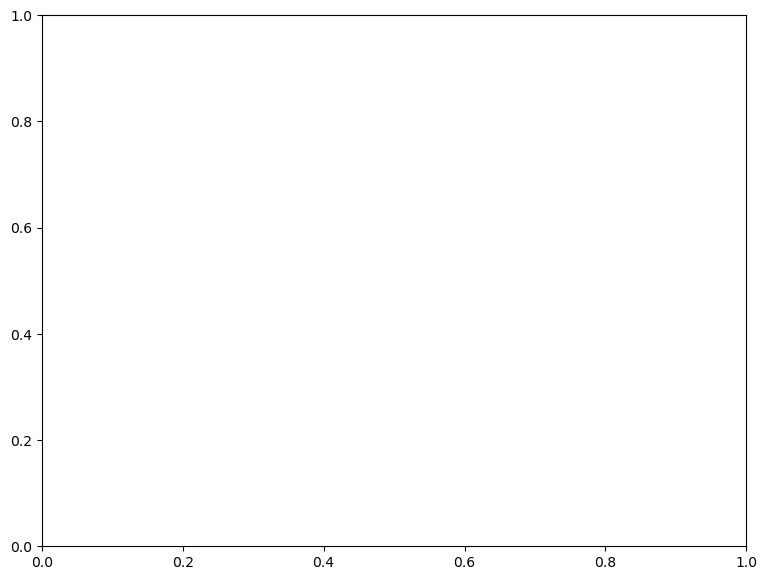

In [19]:
def net_benefit(probabilities, y_true, threshold):
        tp = np.sum((probabilities >= threshold) & (y_true == 1))
        fp = np.sum((probabilities >= threshold) & (y_true == 0))
        fn = np.sum((probabilities < threshold) & (y_true == 1))
        tn = np.sum((probabilities < threshold) & (y_true == 0))
        
        prevalence = (tp + fn) / (tp + fp + tn + fn)
        net_benefit = tp / (tp + fp + tn + fn) - (fp / (tp + fp + tn + fn)) * (threshold / (1 - threshold))
        return net_benefit


plot_curves(models=optimized_models,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,ci_results=results_dict)
